In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
broadband = pd.read_csv('202006_fixed_laua_performance_wrangled.csv')

In [7]:
broadband.describe()

,medDown,averageDown,medUpload,averageUpload
count,379.000000,379.000000,379.000000,379.000000
mean,53.684433,68.916359,9.850660,12.778364
std,14.905336,20.071742,0.850097,6.736355
min,19.300000,31.600000,1.200000,5.400000
25%,40.000000,49.800000,10.000000,10.600000
50%,52.200000,70.800000,10.000000,11.800000
75%,65.300000,85.300000,10.000000,12.700000
max,107.000000,163.000000,20.000000,98.100000


In [4]:

broadband["laua_name"][broadband["averageUpload"] == broadband["averageUpload"].max()]
broadband["averageDown"].min()

31.6

In [12]:
broadband["averageUpload"].mean()

12.778364116094979

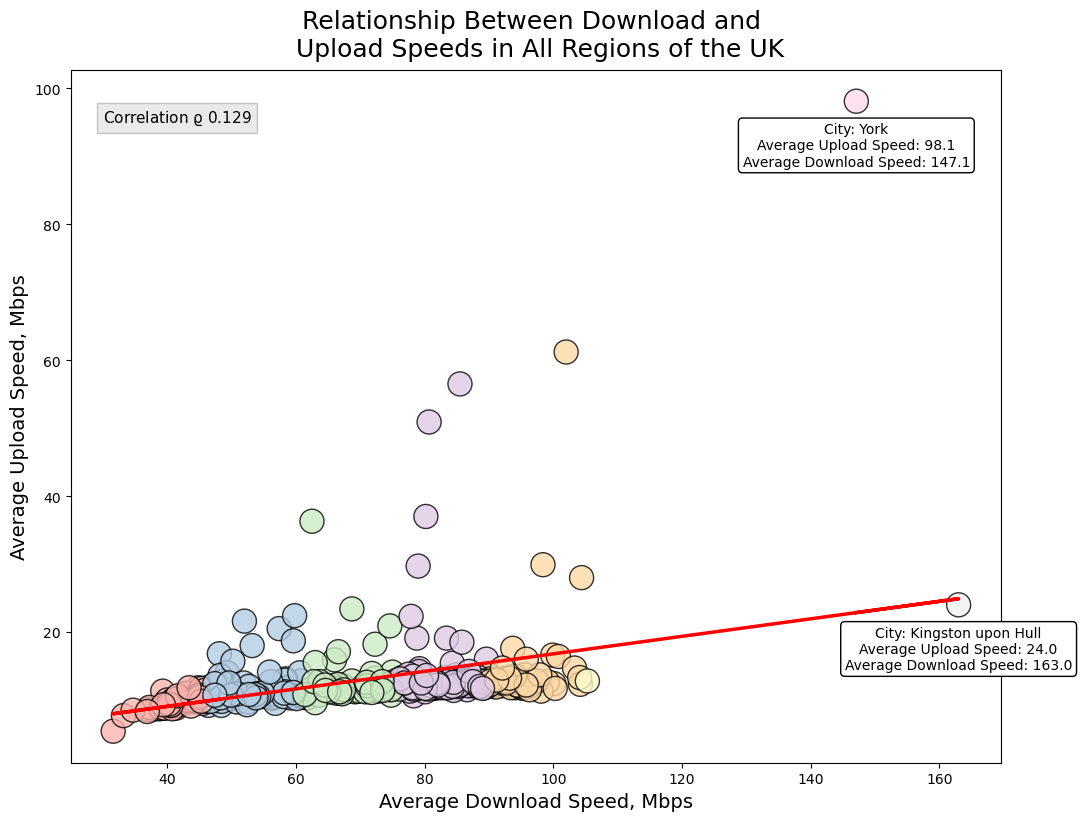

In [6]:
plt.rcdefaults()

# x and y values, index for color mapping
x = c = broadband["averageDown"]
y = broadband["averageUpload"]

# linear regression
a, b = np.polyfit(x, y ,1)
lin_reg = a*x+b

# plot and figure
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)

# labels
ax.set_xlabel('Average Download Speed, Mbps', fontsize=14)
ax.set_ylabel('Average Upload Speed, Mbps', fontsize=14)
ax.set_title('Relationship Between Download and \n Upload Speeds in All Regions of the UK', fontsize=18, pad=10)

# plotting the scatter plot and linear regression line
ax.scatter( 
        x,
        y, 
        s=300,
        alpha=0.8,
        c=c,
        cmap='Pastel1',
        edgecolors='black')

ax.plot(
        x, 
        lin_reg, 
        color="red", 
        lw=2.5)

x_an1 = broadband["averageDown"][broadband["laua_name"] == "YORK"]
y_an1 = broadband["averageUpload"][broadband["laua_name"] == "YORK"]
x_an2 = broadband["averageDown"][broadband["laua_name"] == "KINGSTON UPON HULL, CITY OF"]
y_an2 = broadband["averageUpload"][broadband["laua_name"] == "KINGSTON UPON HULL, CITY OF"]

s1 = """City: York
Average Upload Speed: 98.1
Average Download Speed: 147.1"""
s2 = """City: Kingston upon Hull
Average Upload Speed: 24.0
Average Download Speed: 163.0"""
q = round(a, 3)
corr ="Correlation ϱ ${}$".format(q)

an1 = ax.annotate(s1, xy=(x_an1, y_an1-6.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an2 = ax.annotate(s2, xy=(x_an2, y_an2-6.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
plt.text(30, 95, corr, fontsize = 11, 
         bbox = dict(facecolor = '#969696', alpha = 0.2))
fig.savefig("Scatter.png")